In [2512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [2513]:
sms_data = pd.read_csv('spam.csv', encoding="latin-1")
sms_data

,label,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5608,spam,Tonight only: Get discount coupons worth $200....,NaN,NaN,NaN
5609,spam,"Dear user, you have been selected for a free m...",NaN,NaN,NaN
5610,spam,Claim a free gift card by answering this surve...,NaN,NaN,NaN
5611,spam,Congratulations! Your device is eligible for u...,NaN,NaN,NaN


In [2514]:
sms_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
sms_data

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5608,spam,Tonight only: Get discount coupons worth $200....
5609,spam,"Dear user, you have been selected for a free m..."
5610,spam,Claim a free gift card by answering this surve...
5611,spam,Congratulations! Your device is eligible for u...


In [2515]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5613 non-null   object
 1   SMS     5613 non-null   object
dtypes: object(2)
memory usage: 87.8+ KB


In [2516]:
sms_data.duplicated().sum()

403

In [2517]:
sms_data.drop_duplicates(keep='last', inplace=True)

In [2518]:
sms_data.duplicated().sum()

0

In [2519]:
sms_data

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5608,spam,Tonight only: Get discount coupons worth $200....
5609,spam,"Dear user, you have been selected for a free m..."
5610,spam,Claim a free gift card by answering this surve...
5611,spam,Congratulations! Your device is eligible for u...


In [2520]:
sms_data['label'].value_counts()

label
ham     4516
spam     694
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1808eb0b0b0>,
 [Text(-1.0050798071911387, 0.44700624288327784, 'spam'),
  Text(1.0050798281170097, -0.4470061958320965, 'ham')],
 [Text(-0.5482253493769846, 0.24382158702724244, '86.7%'),
  Text(0.5482253607910961, -0.2438215613629617, '13.3%')])

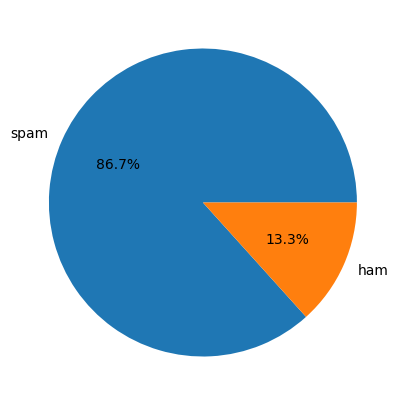

In [2521]:
plt.figure(figsize=(6,5))
plt.pie(sms_data['label'].value_counts(), labels={'ham','spam'}, autopct='%1.1f%%')

In [2522]:
spam_email = pd.read_csv('spam_ham_dataset.csv')
spam_email

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [2523]:
spam_email.drop(columns=['Unnamed: 0', 'label_num'], inplace=True)

In [2524]:
spam_email.rename(columns={'text': 'SMS'}, inplace=True)

In [2525]:
spam_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   SMS     5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [2526]:
spam_email.duplicated().sum()

178

In [2527]:
spam_email.drop_duplicates(inplace=True, keep='first')

In [2528]:
data = pd.concat([spam_email, sms_data])
print("first five data are:\n","=>"*10)
print(data.head(5))

first five data are:
 =>=>=>=>=>=>=>=>=>=>
  label                                                SMS
0   ham  Subject: enron methanol ; meter # : 988291\r\n...
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...
3  spam  Subject: photoshop , windows , office . cheap ...
4   ham  Subject: re : indian springs\r\nthis deal is t...


In [2529]:
data

,label,SMS
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5608,spam,Tonight only: Get discount coupons worth $200....
5609,spam,"Dear user, you have been selected for a free m..."
5610,spam,Claim a free gift card by answering this surve...
5611,spam,Congratulations! Your device is eligible for u...


In [2530]:
data = data.reset_index(drop=True)

In [2531]:
data['label'].value_counts()

label
ham     8047
spam    2156
Name: count, dtype: int64

### Distribution of dataset

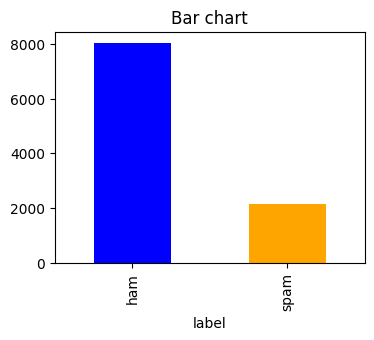

In [2532]:
plt.figure(figsize=(4,3))
count_Class=pd.value_counts(data["label"], sort=True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

### Text Analytics

We want to find the frequencies of words in the spam and non-spam messages. The words of the messages will be model features.
We use the function Counter.

In [2533]:
count1 = Counter(" ".join(data[data['label']=='ham']["SMS"]).split()).most_common(22)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["SMS"]).split()).most_common(22)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

In [2534]:
df2['words in spam']

0        .
1        ,
2        -
3      the
4        /
5       to
6      and
7        :
8       of
9        a
10      in
11       =
12     you
13     for
14       !
15      is
16    this
17    your
18       ?
19       '
20       $
21    with
Name: words in spam, dtype: object

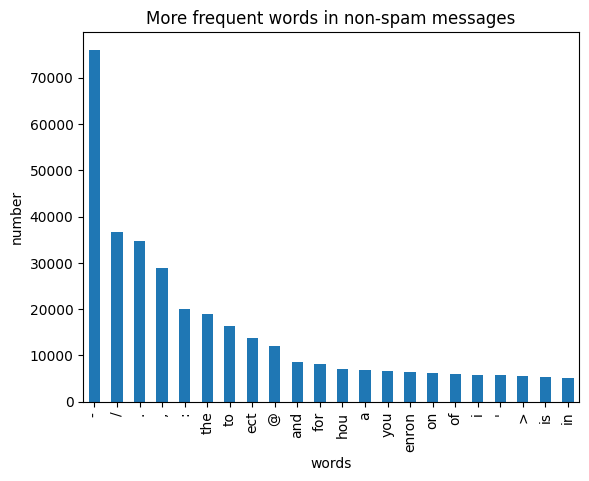

In [2535]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

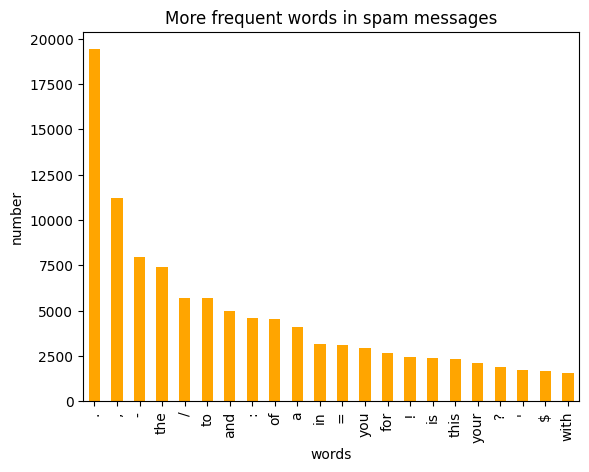

In [2536]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that the majority of frequent words in both classes are stop words such as 'to', 'a', 'or' and so on. <p>
With stop words we refer to the most common words in a language, there is no single, universal list of stop words. <p>

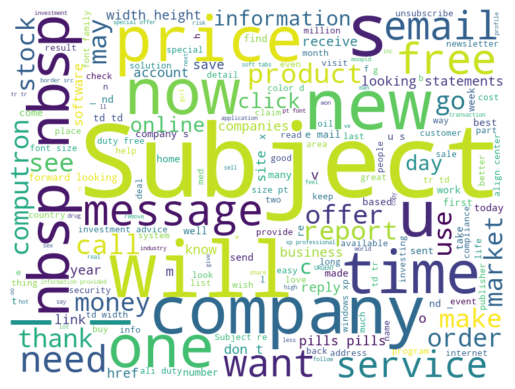

[('.', 19401), (',', 11201), ('-', 7975), ('the', 7392), ('/', 5697), ('to', 5696), ('and', 4996), (':', 4602), ('of', 4563), ('a', 4098), ('in', 3180), ('=', 3092), ('you', 2925), ('for', 2680), ('!', 2438), ('is', 2382), ('this', 2323), ('your', 2108), ('?', 1908), ("'", 1750)]


In [2537]:
from wordcloud import WordCloud
wc = WordCloud(width=750, height=560, background_color='white')
spam_text = " ".join(data[data['label']=='spam']['SMS'])
wc.generate(spam_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
words = spam_text.split()
words_counts = Counter(words)
print(words_counts.most_common(20))

In [2538]:
#let's map the values of target column ( class )
data["label"]=data["label"].map({'spam':1,'ham':0})


([<matplotlib.patches.Wedge at 0x18083ad6330>,
 [Text(-0.8663876857933703, 0.6777701512353641, 'spam'),
  Text(0.8663877175220799, -0.6777701106768289, 'ham')],
 [Text(-0.47257510134183833, 0.36969280976474406, '78.9%'),
  Text(0.4725751186484072, -0.3696927876419066, '21.1%')])

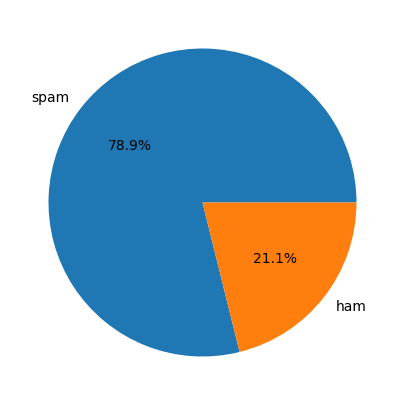

In [2539]:
plt.figure(figsize=(6,5))
plt.pie(data['label'].value_counts(), labels={'ham','spam'}, autopct='%1.1f%%')

In [2540]:
data.rename(columns={'SMS':'Message'}, inplace=True)

In [2541]:
data.to_csv("spamham.csv", index=False)

In [2542]:
df = pd.read_csv('spamham.csv')

In [2543]:
data.duplicated().sum()

0

##### nltk.stem 
NLTK Stemmers

Interfaces used to remove morphological affixes from words, leaving only the word stem. Stemming algorithms aim to remove those affixes required for eg. grammatical role, tense, derivational morphology leaving only the stem of the word. This is a difficult problem due to irregular words (eg. common verbs in English), complicated morphological rules, and part-of-speech and sense ambiguities (eg. ceil- is not the stem of ceiling).

In [2544]:

from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')
from nltk.stem import PorterStemmer


stopwords 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 
 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 
 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 
 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 
 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', ...]

In [2545]:
stop_words = set(stopwords.words('english'))
# ps = PorterStemmer()

# def clean_text(text):
#     text = text.lower()  # lowercase
#     text = re.sub(r'\n', ' ', text)  # remove newlines
#     text = re.sub(r'\d+', '', text)  # remove numbers
#     text = re.sub(r'[^\w\s$!]', '', text)  # keep words, spaces, and spam symbols like $ and !
#     words = text.split()
#     words = [w for w in words if w not in stop_words]  # remove stopwords
#     words = [ps.stem(w) for w in words]  # stemming
#     return " ".join(words)

# data['Message_clean'] = data['Message'].apply(clean_text)
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
lemmatizer = WordNetLemmatizer()

def clean_text_lemmatize(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s$!]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]  # lemmatize instead of stem
    return " ".join(words)

data['Message_clean'] = data['Message'].apply(clean_text_lemmatize)



#### What is lemmatization?

- Lemmatization is the process of converting a word to its dictionary form, also called the lemma.
- Unlike stemming, which just chops letters off, lemmatization returns a real word.

| Original | Stemmed (Porter) | Lemmatized |
| -------- | ---------------- | ---------- |
| running  | run              | run        |
| better   | better           | good       |
| devices  | devic            | device     |
| eligible | elig             | eligible   |
| went     | went             | go         |


In [2546]:
data

,label,Message,Message_clean
0,0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter follow note gave ...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom january see attached file hpln...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat ho ho ho around wonderful...
3,1,"Subject: photoshop , windows , office . cheap ...",subject photoshop window office cheap main tre...
4,0,Subject: re : indian springs\r\nthis deal is t...,subject indian spring deal book teco pvr reven...
...,...,...,...
10198,1,Tonight only: Get discount coupons worth $200....,tonight get discount coupon worth $ hurry http...
10199,1,"Dear user, you have been selected for a free m...",dear user selected free medical trial reply me...
10200,1,Claim a free gift card by answering this surve...,claim free gift card answering survey httpsurv...
10201,1,Congratulations! Your device is eligible for u...,congratulations! device eligible upgrade reply...


In [2547]:
print(data['Message'].sample(5))

8264                Damn, poor zac doesn't stand a chance
1110    Subject: accum .\r\n- - - - - - - - - - - - - ...
4042    Subject: affordable pharmaceuticals ( valium ,...
3961               Subject: your ebay auction payment\r\n
4501    Subject: cdnow shipment confirmation\r\ndear d...
Name: Message, dtype: object


In [2548]:
print(data['Message_clean'].tail(5))

10198    tonight get discount coupon worth $ hurry http...
10199    dear user selected free medical trial reply me...
10200    claim free gift card answering survey httpsurv...
10201    congratulations! device eligible upgrade reply...
10202    claim free gift card answering survey httprewa...
Name: Message_clean, dtype: object


In [2549]:
data.drop(columns=['Message'], inplace=True)
data

,label,Message_clean
0,0,subject enron methanol meter follow note gave ...
1,0,subject hpl nom january see attached file hpln...
2,0,subject neon retreat ho ho ho around wonderful...
3,1,subject photoshop window office cheap main tre...
4,0,subject indian spring deal book teco pvr reven...
...,...,...
10198,1,tonight get discount coupon worth $ hurry http...
10199,1,dear user selected free medical trial reply me...
10200,1,claim free gift card answering survey httpsurv...
10201,1,congratulations! device eligible upgrade reply...


In [2550]:
print(data.duplicated().sum())
data.drop_duplicates(keep='first', inplace=True)
data.shape

459


(9744, 2)

In [2551]:
example ='Hey, Jesse! What is up with the deal? When are you going to make the meth in our lab? It has been days, since we have cooked together.'
print(clean_text_lemmatize(example))

hey jesse! deal going make meth lab day since cooked together


#### tokenization

##### 🔹 How to tokenize in Python
1. Using NLTK

    import nltk<br>
    from nltk.tokenize import word_tokenize<br>
    nltk.download("punkt")<br>
    data["tokens"] = data["cleaned_text"].apply(word_tokenize)<br>

    "claim free gift card" → ['claim', 'free', 'gift', 'card']

2. Using scikit-learn (for ML models)
Actually, if you plan to use **CountVectorizer** or **TfidfVectorizer**, you don’t need to tokenize manually<br> scikit-learn does it for you.

    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data["cleaned_text"])




##### 🔹 Should you tokenize?

👉 Depends on what you’re doing next:

Classical ML (Naive Bayes, SVM, Logistic Regression):
✅ No need to manually tokenize → just use TfidfVectorizer or CountVectorizer.

Deep Learning (LSTM, CNN, Transformers):
✅ Yes, tokenize and usually convert to sequences with Tokenizer (from Keras) or HuggingFace tokenizers.

In [2552]:
from nltk.tokenize import word_tokenize

#### Feature Engineering

Text pre-processing, tokenizing and filtering of stopwords all comes under feature engineering.
- We remove the stopwords for improving the anlytics.

In [2553]:
 
# CountVectorizer - Convert a collection of text documents to a matrix of token counts.This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

# f = feature_extraction.text.CountVectorizer() # CountVectorizer(stop_words='english') - since we have already removed stop words
from sklearn.feature_extraction.text import TfidfVectorizer
f = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9, sublinear_tf=True)
X = f.fit_transform(data['Message_clean'])
y = data.label
print(np.shape(X))

(9744, 17722)


In [2554]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 411861 stored elements and shape (9744, 17722)>
  Coords	Values
  (0, 15026)	0.05064175079693748
  (0, 5171)	0.08743246497122481
  (0, 9993)	0.18149805422817547
  (0, 9878)	0.10184742341916335
  (0, 6085)	0.14867495831962776
  (0, 10912)	0.13196225477661536
  (0, 6570)	0.17826948287867225
  (0, 10252)	0.1386728523814773
  (0, 12303)	0.1892850128763754
  (0, 6031)	0.12215116243709523
  (0, 3669)	0.1526035418489772
  (0, 12667)	0.15666044296225193
  (0, 3617)	0.09633028139653653
  (0, 11967)	0.07627074304440017
  (0, 11371)	0.23914366647174337
  (0, 12199)	0.15570864545247207
  (0, 3580)	0.22070986311396373
  (0, 16904)	0.10327281893245106
  (0, 12338)	0.1809344011135108
  (0, 17683)	0.15618064322315328
  (0, 13109)	0.16991887111580767
  (0, 138)	0.14521524661152574
  (0, 11020)	0.20105453911880997
  (0, 6466)	0.09448340411318827
  (0, 3190)	0.14741661539127154
  :	:
  (9740, 14011)	0.33836443712309777
  (9740, 9754)	0.3242941

- 👉 9744 = number of rows (documents/messages)
- 👉 47030 = number of features (unique words/tokens in your vocabulary)

So we have created 47,030 features 

Each column = **one unique word** across your dataset,
**Each row = one message**,
Each cell = count of that word in that message.



In [2555]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

In [2556]:
X_train.shape, X_test.shape, y_train.shape

((7113, 17722), (2631, 17722), (7113,))

#### Multinomial Bayes Classifier

- We train different Bayes' models changing the regularization parameter - "alpha"
- We evaluate the accuracy, recall, and precision.

In [2557]:
from sklearn.metrics import recall_score, precision_score, f1_score
list_alpha = np.arange(1/100000, 5, 0.019) # start from 0.0001, increasing by 0.11 per step, until just before 20 
# list_alpha is a numpy array with 182 elements

train_score = np.zeros(len(list_alpha))
test_score = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test = np.zeros(len(list_alpha))
f1_test = np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    nb = naive_bayes.MultinomialNB(alpha=alpha)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    train_score[count] = nb.score(X_train, y_train)
    test_score[count] = nb.score(X_test, y_test)
    recall_test[count] = recall_score(y_test, y_pred)
    precision_test[count] = precision_score(y_test, y_pred)
    f1_test[count] = f1_score(y_test, y_pred)
    count+=1

In [2558]:
train_score.shape, precision_test.shape

((264,), (264,))

In [2559]:
train_score

array([0.98805005, 0.98481653, 0.98467595, 0.98369183, 0.98312948,
       0.98228596, 0.98144243, 0.98130184, 0.98073949, 0.98031773,
       0.97989597, 0.97961479, 0.97919303, 0.97919303, 0.97863068,
       0.97806833, 0.97778715, 0.97750597, 0.97708421, 0.97708421,
       0.97694362, 0.97652186, 0.97595951, 0.97483481, 0.97441305,
       0.97399128, 0.97328835, 0.97314776, 0.97230423, 0.97174188,
       0.97160129, 0.97174188, 0.97146071, 0.97117953, 0.97117953,
       0.97089836, 0.97005483, 0.96977365, 0.96907072, 0.96878954,
       0.96836778, 0.9680866 , 0.96766484, 0.96752425, 0.96738366,
       0.96611837, 0.96555602, 0.9647125 , 0.96429074, 0.96302545,
       0.96260368, 0.96260368, 0.96133839, 0.96119781, 0.96105722,
       0.96021369, 0.95979193, 0.95922958, 0.95880782, 0.95852664,
       0.95810488, 0.9578237 , 0.95712076, 0.95627724, 0.95543371,
       0.95487136, 0.95430901, 0.95388725, 0.95318431, 0.95262196,
       0.9522002 , 0.95149726, 0.95121608, 0.95135667, 0.95093

In [2560]:
matrix = np.matrix(np.c_[list_alpha, train_score, test_score, recall_test, precision_test, f1_test])
models = pd.DataFrame(data=matrix, columns=['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision', 'F1 Score'])
models

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision,F1 Score
0,0.00001,0.988050,0.961992,0.931579,0.896959,0.913941
1,0.01901,0.984817,0.966173,0.940351,0.906937,0.923342
2,0.03801,0.984676,0.967693,0.936842,0.915952,0.926279
3,0.05701,0.983692,0.966933,0.933333,0.915663,0.924414
4,0.07601,0.983129,0.967313,0.931579,0.918685,0.925087
...,...,...,...,...,...,...
259,4.92101,0.863630,0.851387,0.314035,1.000000,0.477971
260,4.94001,0.863068,0.850627,0.310526,1.000000,0.473896
261,4.95901,0.862786,0.850627,0.310526,1.000000,0.473896
262,4.97801,0.862224,0.849867,0.307018,1.000000,0.469799


In [2561]:
winner_precison = models[models['Test Precision']==models['Test Precision'].max()]
winner_precison

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision,F1 Score
108,2.05201,0.931534,0.921323,0.636842,1.0,0.778135
109,2.07101,0.930971,0.921323,0.636842,1.0,0.778135
110,2.09001,0.930269,0.920943,0.635088,1.0,0.776824
111,2.10901,0.929847,0.919802,0.629825,1.0,0.772874
112,2.12801,0.929566,0.919042,0.626316,1.0,0.770227
...,...,...,...,...,...,...
259,4.92101,0.863630,0.851387,0.314035,1.0,0.477971
260,4.94001,0.863068,0.850627,0.310526,1.0,0.473896
261,4.95901,0.862786,0.850627,0.310526,1.0,0.473896
262,4.97801,0.862224,0.849867,0.307018,1.0,0.469799


In [2562]:
models['Test Accuracy'].max()

0.9711136450019004

In [2563]:
winner_f1 = models.loc[models['F1 Score'].idxmax()]
winner_f1

alpha             0.209010
Train Accuracy    0.979615
Test Accuracy     0.971114
Test Recall       0.924561
Test Precision    0.941071
F1 Score          0.932743
Name: 11, dtype: float64

What matters for spam detection?

- Recall: catching actual spam (important to not miss spam).
- Precision: not flagging legit emails as spam.
- F1 Score: balances the two.
- Accuracy: okay for general overview but misleading if classes are imbalanced (like your ham>spam dataset).

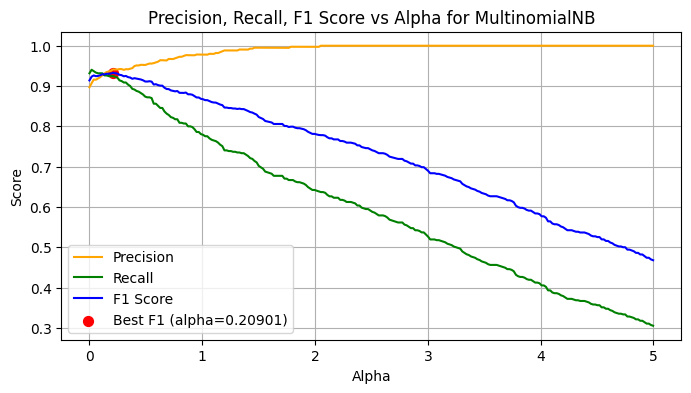

In [2564]:
import matplotlib.pyplot as plt


best_idx = models['F1 Score'].idxmax()
best_alpha = models.loc[best_idx, 'alpha']
best_f1 = models.loc[best_idx, 'F1 Score']

plt.figure(figsize=(8,4))
plt.plot(list_alpha, models['Test Precision'], label='Precision', color='orange')
plt.plot(list_alpha, models['Test Recall'], label='Recall', color='green')
plt.plot(list_alpha, models['F1 Score'], label='F1 Score', color='blue')
plt.scatter(best_alpha, best_f1, color='red', s=50, label=f'Best F1 (alpha={best_alpha:.5f})')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score vs Alpha for MultinomialNB')
plt.legend()
plt.grid(True)
plt.show()


In [2565]:
confusion_test = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(data=confusion_test, columns=['predicted 0', 'predicted 1'],
             index=['Actual 0', 'Actual 1'])


,predicted 0,predicted 1
Actual 0,2061,0
Actual 1,396,174


In [2566]:
model = naive_bayes.MultinomialNB(alpha=0.20901)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print('Test accuracy', model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_pred2))
print('f1 score:',f1_score(y_test, y_pred2))

Test accuracy 0.9711136450019004
[[2028   33]
 [  43  527]]
f1 score: 0.9327433628318584


In [2569]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2061
           1       0.94      0.92      0.93       570

    accuracy                           0.97      2631
   macro avg       0.96      0.95      0.96      2631
weighted avg       0.97      0.97      0.97      2631

